In [2]:
from importlib import reload
import c_rnn_gan.src.CRG_run as crg_run
import c_rnn_gan.src.training_constants as tc

reload(crg_run)
reload(tc)

<module 'c_rnn_gan.src.training_constants' from 'C:\\Users\\hugop\\Documents\\Uni\\Graphics\\COMPSCI715\\c_rnn_gan\\src\\training_constants.py'>

In [3]:
class Args:
    def __init__(self, **entries):
        self.__dict__.update(entries)
        
args_dict = {
    'load_g': False,
    'load_d': False,
    'save_g': False,
    'save_d': False,
    'model_save_path': r"C:\Users\hugop\Documents\Uni\Graphics\COMPSCI715\c_rnn_gan\models",
    'num_epochs': 1,
    'seq_len': tc.SEQ_LENGTH_DEFAULT,
    'batch_size': tc.BATCH_SIZE_DEFAULT,
    'g_learn_rate': tc.G_LRN_RATE_DEFAULT,
    'd_learn_rate': tc.D_LRN_RATE_DEFAULT,
    'epsilon': tc.EPSILON_DEFAULT,
    'max_grad_norm': tc.MAX_GRAD_NORM_DEFAULT,
    'max_seq_length': tc.MAX_SEQ_LEN_DEFAULT,
    'per_nth_batch_print_memory': tc.PER_NTH_BATCH_PRINT_MEMORY_DEFAULT,
    'subset_size': -1,
    'g_hidden_units': tc.G_HIDDEN_UNITS_DEFAULT,
    'd_hidden_units': tc.D_HIDDEN_UNITS_DEFAULT,
    'g_drop_prob': tc.G_DROP_PROB_DEFAULT,
    'd_drop_prob': tc.D_DROP_PROB_DEFAULT,
    'no_pretraining': False,
    'g_pretraining_epochs': 5,
    'd_pretraining_epochs': 5,
    'use_sgd': False,
    'conditional_freezing': False,
    'label_smoothing': False,
    'feature_matching': False,
    'dataset_root': r"C:\Users\hugop\Documents\Uni\Graphics\COMPSCI715\datasets",
    'writer_path': r"C:\Users\hugop\Documents\Uni\Graphics\COMPSCI715\c_rnn_gan\logs\experiment7",
    'game_name': 'Flight_Squad',
    'train_session_set': None,
    'cols_to_keep': "head_pos_x,head_pos_y",
    "verbose" : False
}

args = Args(**args_dict)

In [4]:
crg_run.main(args)

Training on GPU.


Epoch Progress (Total: 1):   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1 



Epoch Progress (Total: 1): 100%|██████████| 1/1 [00:49<00:00, 49.88s/it]

Trn:  0.9650817952129278 0.03360942378566189
[Training] G_loss: 8.93237737 %, D_loss: 0.09324255, D_acc: 97.62



In [54]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

log_dir = r"C:\Users\hugop\Documents\Uni\Graphics\COMPSCI715\c_rnn_gan\logs\experiment6"

event_acc = EventAccumulator(log_dir)
event_acc.Reload()

print(event_acc.Tags())

{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Loss/g_loss', 'Loss/d_loss', 'Accuracy/d_acc'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


In [55]:
import matplotlib.pyplot as plt

d_loss = event_acc.Scalars('Loss/d_loss')
g_loss = event_acc.Scalars('Loss/g_loss')
d_acc = event_acc.Scalars('Accuracy/d_acc')

In [59]:
import numpy as np
xticks = np.arange(1, len(d_loss) + 1)

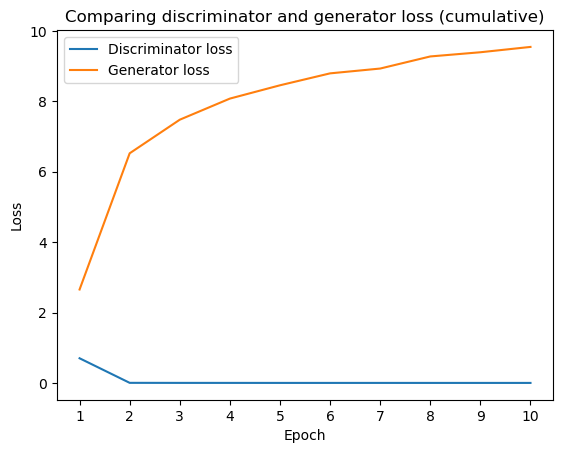

In [67]:
plt.plot([i.step+1 for i in d_loss], [i.value for i in d_loss], label='Discriminator loss')
plt.plot([i.step+1 for i in g_loss], [i.value for i in g_loss], label='Generator loss')
plt.title('Comparing discriminator and generator loss (cumulative)')
plt.xlabel("Epoch")
plt.xticks(np.arange(1, len(d_loss) + 1))
plt.ylabel("Loss")
plt.legend()
plt.savefig(dpi = 300, fname = r"C:\Users\hugop\Documents\Uni\Graphics\COMPSCI715\loss.png")
plt.show()

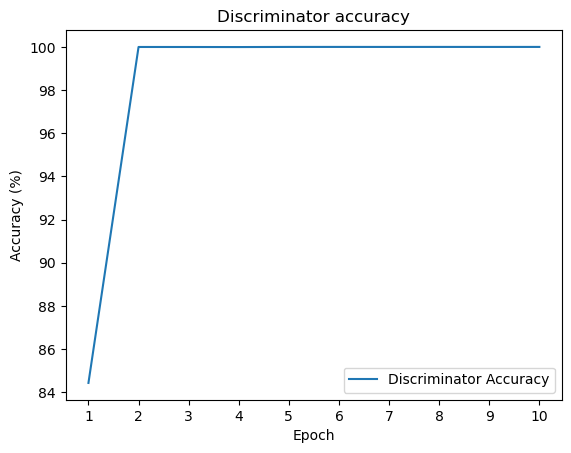

In [68]:
plt.plot([i.step+1 for i in d_acc], [i.value for i in d_acc], label='Discriminator Accuracy')
plt.xticks(np.arange(1, len(d_loss) + 1))
plt.legend()
plt.title('Discriminator accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.savefig(dpi = 300, fname = r"C:\Users\hugop\Documents\Uni\Graphics\COMPSCI715\discriminator_accuracy.png")
plt.show()

In [12]:
import numpy as np
import os

gen_output = {}

gen_output_dir = r"C:\Users\hugop\Documents\Uni\Graphics\COMPSCI715\c_rnn_gan\logs\output\exp7"

for file in os.listdir(gen_output_dir):
    if file.endswith(".npy"):
        arr = np.load(os.path.join(gen_output_dir, file))
        gen_output[file] = arr

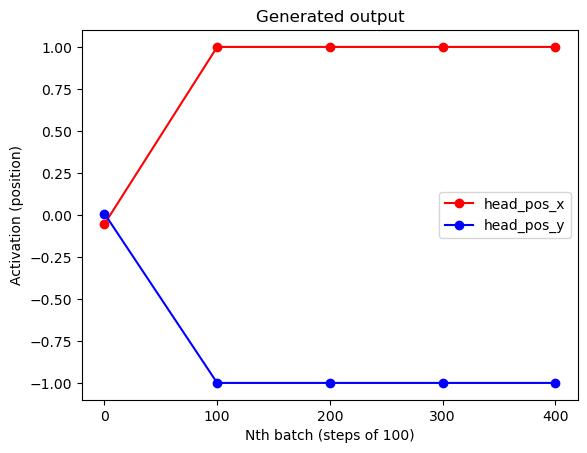

In [58]:
import matplotlib.pyplot as plt

gen_output_stack = np.stack(list(gen_output.values()))
x_ticks = np.arange(0, (len(gen_output) - 1) * 100 + 1, step=100)

plt.plot(x_ticks, gen_output_stack[:, 0, 0], label="head_pos_x", color='red', marker='o')
plt.plot(x_ticks, gen_output_stack[:, 0, 1], label="head_pos_y", color='blue', marker='o')
plt.xticks(x_ticks)
plt.xlabel("Nth batch (steps of 100)")
plt.ylabel("Activation (position)")
plt.legend()
plt.title("Generated output")
plt.savefig(dpi = 300, fname = r"C:\Users\hugop\Documents\Uni\Graphics\COMPSCI715\gen_output.png")
plt.show()